In [0]:
import keras
import numpy as np
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
!pip install numpy==1.16.1

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 2s 0us/step


In [0]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    print results.shape
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [0]:

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [0]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
print y_train[:10]

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
decoded_review

u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0205 11:56:01.326118 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0205 11:56:01.338054 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0205 11:56:01.346596 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0205 12:01:51.867816 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0205 12:01:51.875621 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0205 12:01:51.932260 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0205 12:01:51.974773 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0205 12:01:51.976226 140059858618240 module_wrapper.py:139] From /usr/local/li

Train on 15000 samples, validate on 10000 samples
Epoch 1/20


W0205 12:01:52.214802 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



15000/15000 [==============================] - 2s 158us/step - loss: 0.1699 - acc: 0.7777 - val_loss: 0.1173 - val_acc: 0.8753
Epoch 2/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0909 - acc: 0.9053 - val_loss: 0.0917 - val_acc: 0.8912
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0636 - acc: 0.9337 - val_loss: 0.0916 - val_acc: 0.8773
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0507 - acc: 0.9456 - val_loss: 0.0841 - val_acc: 0.8859
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0413 - acc: 0.9569 - val_loss: 0.0833 - val_acc: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0334 - acc: 0.9659 - val_loss: 0.0983 - val_acc: 0.8674
Epoch 7/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0287 - acc: 0.9726 - val_loss: 0.0865 - val_acc: 0.8837
Epoch 8/20
15000/15000 [=====================

In [0]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

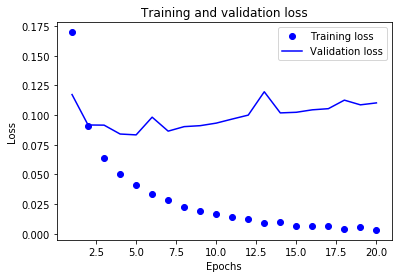

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

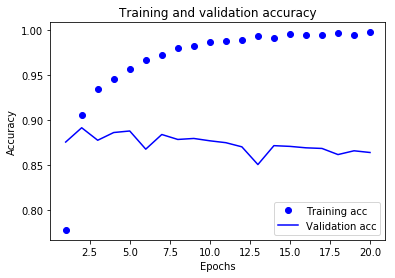

In [0]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
from keras.utils import to_categorical

partial_y_train = to_categorical(partial_y_train)

In [0]:
y_val = to_categorical(y_val)

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0205 12:08:49.142682 140059858618240 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0804 - acc: 0.9755 - val_loss: 0.3482 - val_acc: 0.8765
Epoch 2/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0653 - acc: 0.9809 - val_loss: 0.3553 - val_acc: 0.8800
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0488 - acc: 0.9869 - val_loss: 0.3982 - val_acc: 0.8777
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0391 - acc: 0.9905 - val_loss: 0.4165 - val_acc: 0.8753
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0335 - acc: 0.9913 - val_loss: 0.4410 - val_acc: 0.8745
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0224 - acc: 0.9959 - val_loss: 0.4730 - val_acc: 0.8742
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0219 - acc: 0.9945 - val_loss: 0.5083 - 

In [0]:
print (x_test[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
result = model.predict(x_test)

In [0]:
result

array([[9.9980396e-01, 1.9607869e-04],
       [2.2339689e-11, 1.0000000e+00],
       [8.4466608e-03, 9.9155337e-01],
       ...,
       [9.9887627e-01, 1.1237294e-03],
       [9.9606138e-01, 3.9385450e-03],
       [4.6325776e-01, 5.3674233e-01]], dtype=float32)

In [0]:
#  thresholding

for i in range(len(result)):
  if result[i] > 0.5:
    result[i] = 1
  else:
    result[i] = 0
  


In [0]:
result

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)